In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import (
    KFold,
    train_test_split,
    GridSearchCV,
)
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score



CARGANDO EL CONJUNTO DE DATOS

In [25]:
dfwater = pd.read_csv('water_potability.csv')
dfwater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


DIOMENSIONES DEL DATASET

In [26]:
dfwater.shape

(3276, 10)

REVISANDO EL CONTENIDO DEL DATASET

In [27]:

dfwater.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [28]:
dfwater.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [29]:
dfwater['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

GRAFICANDO LOS DATOS

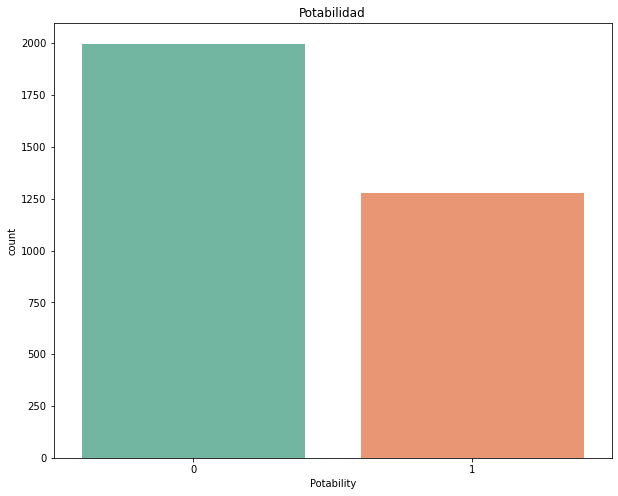

In [30]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Potability',data=dfwater,palette="Set2")
plt.title("Potabilidad")
plt.show()

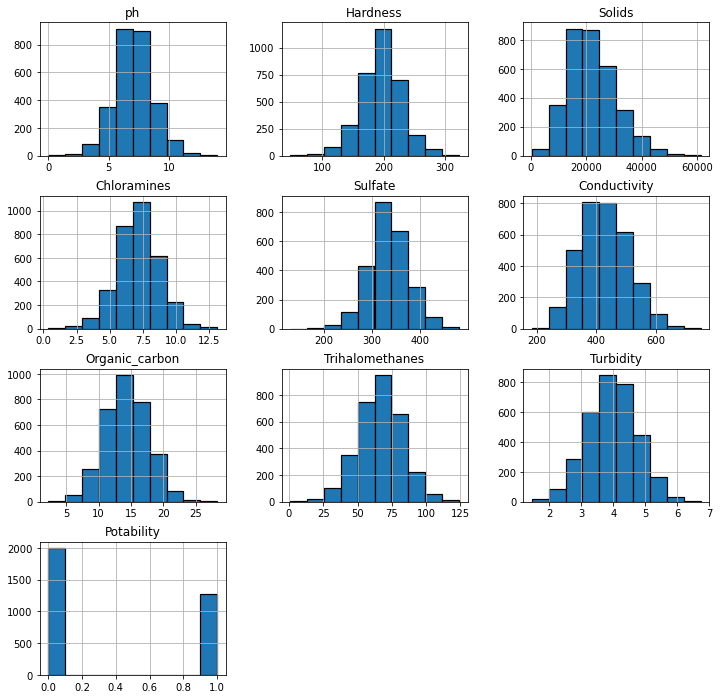

In [31]:
dfwater.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

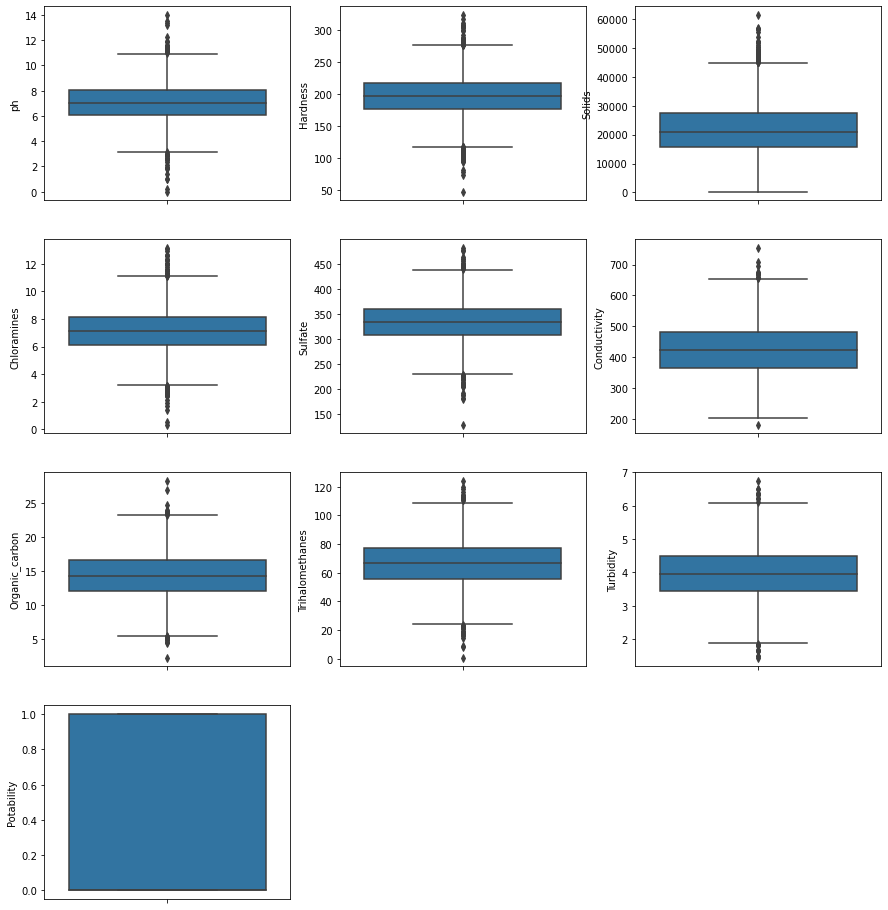

In [32]:
i=1
plt.figure(figsize=(15,25))
for feature in dfwater.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=dfwater[feature])
    i+=1

VIENDO LA CORRELACION DE LOS DATOS

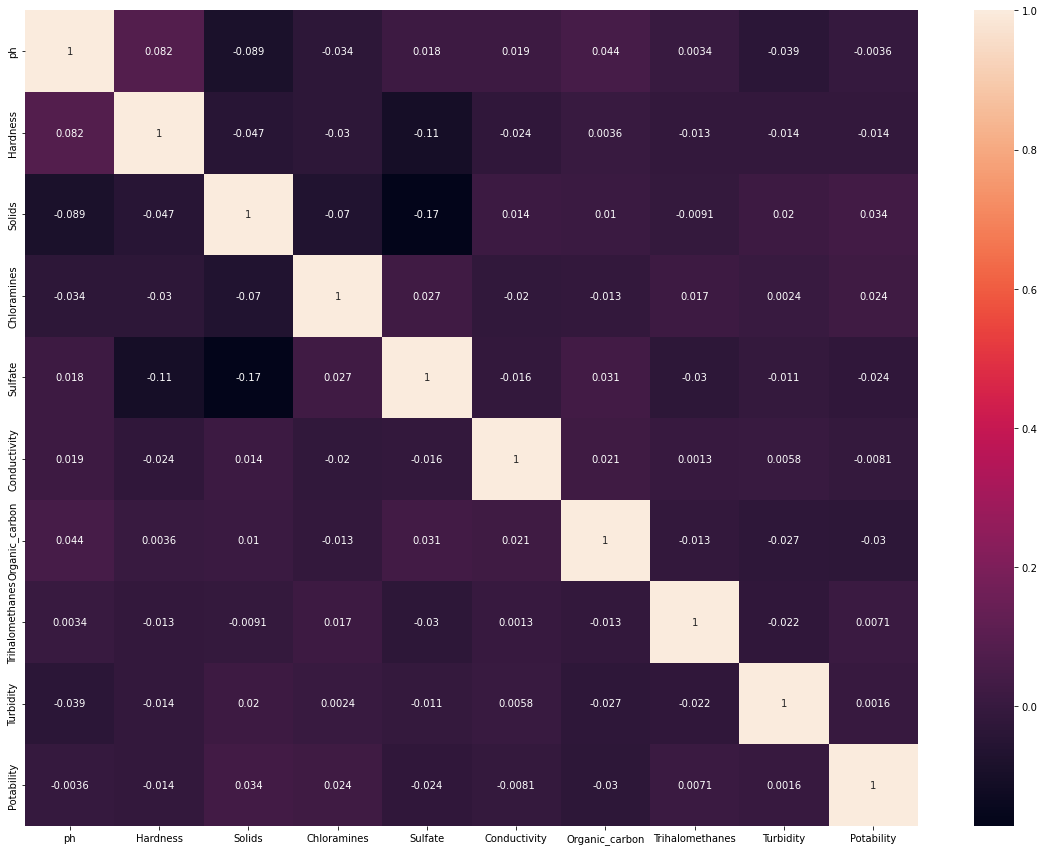

In [33]:
plt.figure(figsize=(20, 15))
corr_matrix = dfwater.corr()
heatmap = sns.heatmap(corr_matrix, annot=True)

In [34]:
print(corr_matrix['Potability'].sort_values(ascending = False),'\n')

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64 



BUSCANDO REGISTROS CON VALORES VACIOS

In [35]:
dfwater.isna().sum().sort_values()

Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
Trihalomethanes    162
ph                 491
Sulfate            781
dtype: int64

CORRGIENDO LOS REGISTROS CON VALORES VACIOS

In [36]:
dfwater['Trihalomethanes'].fillna(value=dfwater['Trihalomethanes'].median(), inplace=True)
dfwater['ph'].fillna(value=dfwater['ph'].median(), inplace=True)
dfwater['Sulfate'].fillna(value=dfwater['Sulfate'].median(), inplace=True)

In [37]:
dfwater.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.036752,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [38]:
dfwater.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

NIVELANDO LOS DATOS

C:\Users\Piedriz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

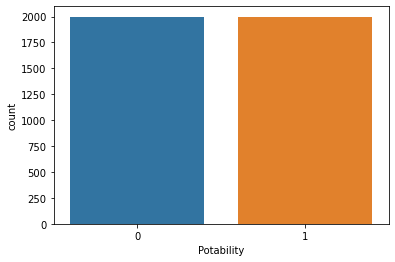

In [39]:
y_target = dfwater['Potability']
x_data = dfwater.drop(['Potability'], axis=1)
smt = SMOTE(random_state=42)
x_data, y_target = smt.fit_resample(x_data, y_target)
sns.countplot(y_target)

ESCALANDO LOS DATOS

In [40]:
scaler = MinMaxScaler()
x_data = pd.DataFrame(scaler.fit_transform(x_data), columns =x_data.columns.to_list())

DIVIENDO EL CONJUNTO DE DATOS PARA ENTRENAMIENTO Y PRUEBA

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2)

APLICANDO RANDOM FOREST

In [51]:

# Random Forest Classifier
ModeloRf = RandomForestClassifier()

# hyperparameter space
param_grid = dict(
    n_estimators = [135,140,145],
    max_depth = [20,25,30],
    min_samples_split = [4,5,6]
)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    ModeloRf,
    param_grid,
    scoring='accuracy',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(x_train, y_train)
# best hyperparameters
search.best_params_

{'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 145}

In [45]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(results.shape)
results

(27, 3)


,params,mean_test_score,std_test_score
0,"{'max_depth': 20, 'min_samples_split': 4, 'n_e...",0.704320,0.017015
1,"{'max_depth': 20, 'min_samples_split': 4, 'n_e...",0.693060,0.011511
2,"{'max_depth': 20, 'min_samples_split': 4, 'n_e...",0.686491,0.022808
3,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.685863,0.009785
4,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.684295,0.007005
5,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.692432,0.010990
6,"{'max_depth': 20, 'min_samples_split': 6, 'n_e...",0.694937,0.012033
7,"{'max_depth': 20, 'min_samples_split': 6, 'n_e...",0.691176,0.011743
8,"{'max_depth': 20, 'min_samples_split': 6, 'n_e...",0.688679,0.016770
9,"{'max_depth': 25, 'min_samples_split': 4, 'n_e...",0.697127,0.014735


MOSTRANDO RESULTADOS Y MATRIZ DE CONFUSION

In [46]:
# let's get the predictions
train_preds = search.predict(x_train)
test_preds = search.predict(x_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, test_preds))

Train Accuracy:  1.0
Test Accuracy:  0.69625
Confusion matrix:
[[278 108]
 [135 279]]


APLICANDO ARBOLES DE DECISION

In [47]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()

# hyperparameter space
param_grid = dict(
    max_depth = [25,30,35],
    min_samples_split = [4,5,6]
)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    dtc,
    param_grid,
    scoring='accuracy',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(x_train, y_train)


# best hyperparameters
search.best_params_

{'max_depth': 35, 'min_samples_split': 5}

In [48]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(results.shape)
results

(9, 3)


,params,mean_test_score,std_test_score
0,"{'max_depth': 25, 'min_samples_split': 4}",0.598245,0.021360
1,"{'max_depth': 25, 'min_samples_split': 5}",0.604817,0.015733
2,"{'max_depth': 25, 'min_samples_split': 6}",0.601996,0.020651
3,"{'max_depth': 30, 'min_samples_split': 4}",0.602629,0.024095
4,"{'max_depth': 30, 'min_samples_split': 5}",0.602001,0.022592
5,"{'max_depth': 30, 'min_samples_split': 6}",0.595435,0.017722
6,"{'max_depth': 35, 'min_samples_split': 4}",0.595432,0.019195
7,"{'max_depth': 35, 'min_samples_split': 5}",0.605442,0.023466
8,"{'max_depth': 35, 'min_samples_split': 6}",0.599186,0.021773


MOSTRANDO RESULTADOS Y MATRIZ DE CONFUSION

In [49]:
# let's get the predictions
train_preds = search.predict(x_train)
test_preds = search.predict(x_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

print("Confusion matrix:\n%s" % confusion_matrix(y_test, test_preds))


Train Accuracy:  0.9712140175219024
Test Accuracy:  0.61625
Confusion matrix:
[[242 144]
 [163 251]]


In [65]:
x_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2457,0.480513,0.544112,0.421821,0.516635,0.618210,0.510347,0.622139,0.557579,0.512053
3737,0.386193,0.695624,0.293358,0.410214,0.762613,0.646456,0.410530,0.640204,0.511872
624,0.448307,0.498818,0.465183,0.482774,0.585909,0.505275,0.344769,0.534508,0.546939
2530,0.440894,0.509101,0.167104,0.576952,0.549728,0.499436,0.729271,0.547011,0.506709
2128,0.393911,0.657632,0.575026,0.312689,0.579704,0.602646,0.487777,0.373534,0.254899


In [90]:
new_data = pd.read_csv('datos_nuevos.csv')
new_data.shape
new_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.35678,0.478907,0.435632,0.456147,0.573923,0.67845,0.456256,0.569349,0.487175


In [91]:
new_preds = search.predict(new_data)
print(new_preds)



[0]
